In [1]:
from google.colab import drive

drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
# 한글 폰트 설치 
!sudo apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 42 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 3s (3,527 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [2]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import re 
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm   
import numpy as np 
import seaborn as sns 

# 마이너스 폰트 깨짐 방지 
mpl.rcParams['axes.unicode_minus'] = False   
%matplotlib inline 

In [4]:
data = pd.read_csv('/content/drive/MyDrive/LAMDA/pet_data/recom_dataset/dog_ratings.csv')

In [8]:
len(data['regdt'].unique())

2143835

In [9]:
data['regdt'] = pd.to_datetime(data['regdt'])

In [13]:
data.sort_values(by='regdt').head(20)

,m_no,goodsno,point,regdt,pet_age,dogname
6,29471,3025,5.0,2009-04-26 21:45:48,1.0,푸들
4,29471,3042,5.0,2009-04-26 22:17:25,1.0,푸들
8,29471,3041,5.0,2009-04-26 22:17:25,1.0,푸들
5,29471,3031,5.0,2009-04-26 22:22:00,1.0,푸들
31,29471,60742,5.0,2009-11-04 20:25:27,1.0,푸들
24,29471,33179,5.0,2009-11-04 20:25:27,1.0,푸들
23,29471,33176,5.0,2009-11-04 20:25:27,1.0,푸들
30,29471,60739,5.0,2009-11-04 20:25:27,1.0,푸들
22,29471,33173,5.0,2009-11-04 20:25:27,1.0,푸들
32,29471,60745,5.0,2009-11-04 20:25:27,1.0,푸들


In [19]:
len(data['regdt'].dt.year.unique())

14

In [31]:
data[data['regdt'].dt.year > 2021]

,m_no,goodsno,point,regdt,pet_age,dogname
342,147524,59857,5.0,2022-01-11 20:39:30,11.0,요크셔 테리어
370,147524,45347,5.0,2022-01-11 20:40:55,10.0,요크셔 테리어
371,147524,45341,4.0,2022-01-11 20:42:20,11.0,요크셔 테리어
1761,255706,75202,4.0,2022-01-31 23:58:46,9.0,푸들
1764,255706,87029,5.0,2022-02-16 15:57:24,9.0,푸들
...,...,...,...,...,...,...
2455785,1078324,48101,5.0,2022-03-08 13:16:47,9.0,포메라니안
2455786,1078324,48089,5.0,2022-03-08 13:14:59,9.0,포메라니안
2455801,1193954,57539,5.0,2022-02-03 20:36:33,3.0,비숑 프리제
2455802,1193954,57527,5.0,2022-02-03 20:35:23,3.0,비숑 프리제


In [3]:
data = pd.read_csv('/content/drive/MyDrive/LAMDA/pet_data/recom_dataset/dog_data.csv')

data.head(2)

,m_no,goodsno,point,regdt,pet_age,dogname
0,29471,259,5.0,2010-04-26 21:45:48.000,2.0,푸들
1,29471,256,5.0,2010-04-26 22:17:25.000,2.0,푸들


In [ ]:
user_98380 = data.loc[data.m_no==98380]
user_98380.head(1)

,m_no,goodsno,point,regdt,pet_age,dogname
70012,98380,25349,4.0,2016-04-04 23:43:51.000,7.0,푸들


In [ ]:
dog_category = pd.read_csv('/content/drive/MyDrive/LAMDA/pet_data/origin_dataset/dogpre.gd_category_202203161107.csv')
dog_category.head(1)

,sno,catnm,category,sort,hidden,has_image,image_file_name,event,om_category,openmarket,percent
0,128,사은품,16,15,1,0,NaN,0,NaN,NaN,0


In [ ]:
cate_cols = ['category', 'catnm']
dog_category = dog_category[cate_cols]

In [ ]:
goods_link = pd.read_csv('/content/drive/MyDrive/LAMDA/pet_data/origin_dataset/dogpre.gd_goods_link_202203161106.csv')
goods_link.head(1)

,sno,goodsno,category,sort,hidden
0,4,4,1001,-1185200690,1


In [ ]:
user_info = user_98380.copy()
goods_list = list(user_info['goodsno'])

In [ ]:
len(user_info)

165

In [ ]:
user_info = pd.merge(user_info, goods_link, on='goodsno')
user_info

,m_no,goodsno,point,regdt,pet_age,dogname,sno,category,sort,hidden
0,98380,25349,4.0,2016-04-04 23:43:51.000,7.0,푸들,62532,44007,0,0
1,98380,11357,5.0,2017-12-17 02:59:45.000,8.0,푸들,58392,39003,0,0
2,98380,10457,5.0,2016-10-30 03:51:12.000,7.0,푸들,58399,39003,0,0
3,98380,10456,4.0,2016-10-30 03:50:00.000,7.0,푸들,58400,39003,0,0
4,98380,10458,5.0,2016-10-30 03:52:24.000,7.0,푸들,58398,39003,0,0
...,...,...,...,...,...,...,...,...,...,...
160,98380,85094,5.0,2016-04-04 23:52:24.000,7.0,푸들,160938,36008,0,0
161,98380,85064,5.0,2016-04-04 23:51:53.000,7.0,푸들,160908,36008,0,0
162,98380,5436,5.0,2016-10-18 22:06:19.000,7.0,푸들,65526,40004,0,0
163,98380,32915,5.0,2016-10-11 22:13:36.000,7.0,푸들,83383,40010,0,0


In [ ]:
user_info = pd.merge(user_info, dog_category, on='category')
user_info

,m_no,goodsno,point,regdt,pet_age,dogname,sno,category,sort,hidden,catnm
0,98380,25349,4.0,2016-04-04 23:43:51.000,7.0,푸들,62532,44007,0,0,신발/양말
1,98380,11357,5.0,2017-12-17 02:59:45.000,8.0,푸들,58392,39003,0,0,탈취/소독
2,98380,10457,5.0,2016-10-30 03:51:12.000,7.0,푸들,58399,39003,0,0,탈취/소독
3,98380,10456,4.0,2016-10-30 03:50:00.000,7.0,푸들,58400,39003,0,0,탈취/소독
4,98380,10458,5.0,2016-10-30 03:52:24.000,7.0,푸들,58398,39003,0,0,탈취/소독
...,...,...,...,...,...,...,...,...,...,...,...
160,98380,85094,5.0,2016-04-04 23:52:24.000,7.0,푸들,160938,36008,0,0,습식사료
161,98380,85064,5.0,2016-04-04 23:51:53.000,7.0,푸들,160908,36008,0,0,습식사료
162,98380,5436,5.0,2016-10-18 22:06:19.000,7.0,푸들,65526,40004,0,0,클리퍼
163,98380,32915,5.0,2016-10-11 22:13:36.000,7.0,푸들,83383,40010,0,0,타월/가운


In [ ]:
user_info_cate = user_info['catnm']
user_info_cate

0      신발/양말
1      탈취/소독
2      탈취/소독
3      탈취/소독
4      탈취/소독
       ...  
160     습식사료
161     습식사료
162      클리퍼
163    타월/가운
164    타월/가운
Name: catnm, Length: 165, dtype: object

In [ ]:
dict_cate = {} 

for val in user_info_cate:
  dict_cate[val] = dict_cate.get(val, 0) + 1 

dict_cate 

{'가슴줄': 1,
 '건식사료': 14,
 '고무장난감': 2,
 '공': 11,
 '급수기/물병': 9,
 '껌': 47,
 '눈/귀': 1,
 '물티슈/크리너': 1,
 '미용가위': 1,
 '발톱/발 관리': 1,
 '배변봉투/집게': 2,
 '배변판': 2,
 '배변패드': 2,
 '봉제장난감': 5,
 '브러쉬/거치대': 2,
 '비스켓/시리얼': 3,
 '사사미': 9,
 '샴푸/린스': 5,
 '소시지': 1,
 '습식사료': 8,
 '식기/식탁': 2,
 '신발/양말': 1,
 '안전문': 1,
 '이동가방': 3,
 '저키/트릿': 10,
 '종합영양제': 1,
 '치실장난감': 6,
 '치아': 4,
 '캔/파우치': 2,
 '클리퍼': 1,
 '타월/가운': 2,
 '탈취/소독': 4,
 '파우더': 1}

In [ ]:
# list(dict_cate.keys())
dict_cate.values()

dict_values([1, 4, 5, 9, 14, 1, 2, 4, 1, 47, 10, 5, 1, 9, 6, 1, 3, 1, 1, 2, 2, 2, 11, 2, 1, 3, 2, 1, 1, 2, 8, 1, 2])

In [ ]:
dict_tmp = sorted(dict_cate.items(), key=lambda x: x[1], reverse=True)[:10]

list_x = []
list_y = []
for x, y in dict_tmp:
  list_x.append(x)
  list_y.append(y)

list_x

['껌', '건식사료', '공', '저키/트릿', '급수기/물병', '사사미', '습식사료', '치실장난감', '샴푸/린스', '봉제장난감']

In [ ]:
def plot_bar_vertical(x, y, title):   # x: list[], y: list[] 
  ''' 
  x축, y축에 들어갈 값을 입력으로 받아 수직 막대 그래프 출력
   ''' 
  # 폰트 설정 
  plt.rc('font', family='NanumBarunGothic') 
  plt.figure(figsize=(15, 8))
  # col_map=['#ffadad', '#ffd6a5', '#fdffb6', '#caffbf', '#ffc6ff','#9bf6ff','#a0c4ff']
  col_map=['#a0c4ff']
  plt.bar(x, y, tick_label=x, color=col_map)
  plt.title(title, fontsize=15, pad=10)
  plt.xticks(x, x, rotation=45)
  plt.tick_params(axis='x', pad=10, length=5)
  plt.show()

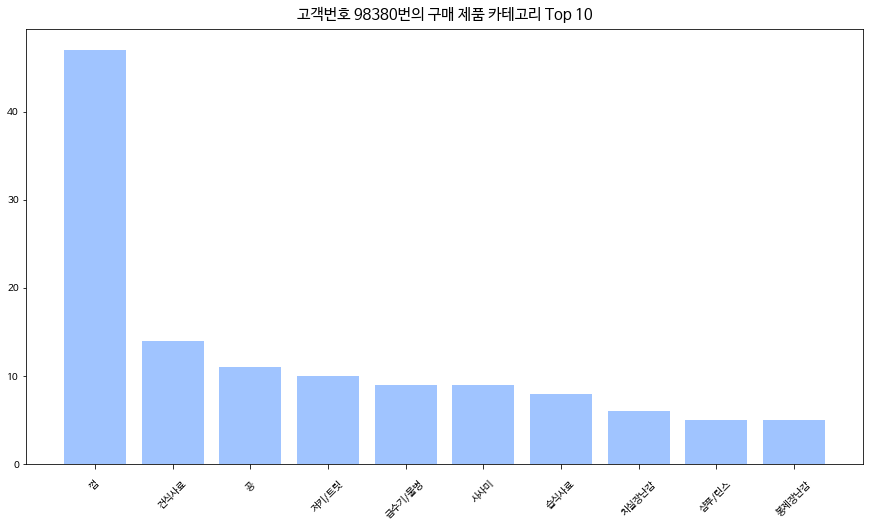

In [ ]:
plot_bar_vertical(list_x, list_y, '고객번호 98380번의 구매 제품 카테고리 Top 10')

In [ ]:
user_info.describe()

,m_no,goodsno,point,pet_age,sno,category,sort,hidden
count,165.0,165.000000,165.000000,165.000000,165.000000,165.000000,165.0,165.0
mean,98380.0,27732.618182,4.593939,7.430303,79132.951515,45403.842424,0.0,0.0
std,0.0,22687.144707,0.633390,0.682751,27895.805161,5877.799225,0.0,0.0
min,98380.0,324.000000,2.000000,6.000000,56446.000000,36004.000000,0.0,0.0
25%,98380.0,11357.000000,4.000000,7.000000,58398.000000,40001.000000,0.0,0.0
50%,98380.0,22880.000000,5.000000,7.000000,70245.000000,47005.000000,0.0,0.0
75%,98380.0,38237.000000,5.000000,8.000000,85343.000000,51002.000000,0.0,0.0
max,98380.0,86168.000000,5.000000,9.000000,164358.000000,51009.000000,0.0,0.0


In [ ]:
cate_points = user_info[['point', 'catnm']]

cate_points.describe().T

,count,mean,std,min,25%,50%,75%,max
point,165.0,4.593939,0.63339,2.0,4.0,5.0,5.0,5.0


In [ ]:
cate_p_df = pd.DataFrame(cate_points.value_counts().reset_index())

In [ ]:
cate_p_df.columns = ['point', 'catnm', 'val_count']
cate_p_df.sort_values('point', ascending=True).head(10)

,point,catnm,val_count
33,2.0,껌,1
12,3.0,급수기/물병,4
9,3.0,건식사료,4
49,3.0,사사미,1
48,3.0,치아,1
4,4.0,껌,6
23,4.0,배변봉투/집게,2
21,4.0,비스켓/시리얼,2
38,4.0,탈취/소독,1
39,4.0,타월/가운,1


In [ ]:
cate_points['point'].value_counts()

5.0    110
4.0     44
3.0     10
2.0      1
Name: point, dtype: int64